In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

2024-02-17 13:02:29.680257: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [8]:
train_dir = 'data/train'
test_dir = 'data/test'

In [10]:
from keras import layers
from keras import models
from keras import optimizers
from keras import losses

from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

In [28]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(layers.MaxPool2D())
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

optimizer = optimizers.SGD(learning_rate=0.002, momentum=0.8)
loss = losses.BinaryCrossentropy()
metrics = ['accuracy']

model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

In [29]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 175232)            0         
                                                                 
 dense_10 (Dense)            (None, 64)                11214912  
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
__________________________________________

In [30]:
train_gen = ImageDataGenerator(rescale=1./255)
train_ds = train_gen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

test_gen = ImageDataGenerator(rescale=1./255)
test_ds = test_gen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.


In [31]:
history = model.fit(train_ds,
                    epochs=10,
                    validation_data=test_ds)

Epoch 1/10
184/184 [==============================] - 9s 46ms/step - loss: 0.6891 - accuracy: 0.5352 - val_loss: 0.6499 - val_accuracy: 0.5969
Epoch 2/10
184/184 [==============================] - 8s 45ms/step - loss: 0.6546 - accuracy: 0.5989 - val_loss: 0.6215 - val_accuracy: 0.6253
Epoch 3/10
184/184 [==============================] - 9s 46ms/step - loss: 0.6210 - accuracy: 0.6552 - val_loss: 0.5779 - val_accuracy: 0.6917
Epoch 4/10
184/184 [==============================] - 9s 47ms/step - loss: 0.5738 - accuracy: 0.7011 - val_loss: 0.5500 - val_accuracy: 0.7353
Epoch 5/10
184/184 [==============================] - 9s 48ms/step - loss: 0.5427 - accuracy: 0.7318 - val_loss: 0.5540 - val_accuracy: 0.7059
Epoch 6/10
184/184 [==============================] - 9s 48ms/step - loss: 0.5150 - accuracy: 0.7669 - val_loss: 0.5711 - val_accuracy: 0.7135
Epoch 7/10
184/184 [==============================] - 9s 46ms/step - loss: 0.4906 - accuracy: 0.7740 - val_loss: 0.5659 - val_accuracy: 0.7048

In [32]:
np.median(np.array(history.history['accuracy']))

0.7493880987167358

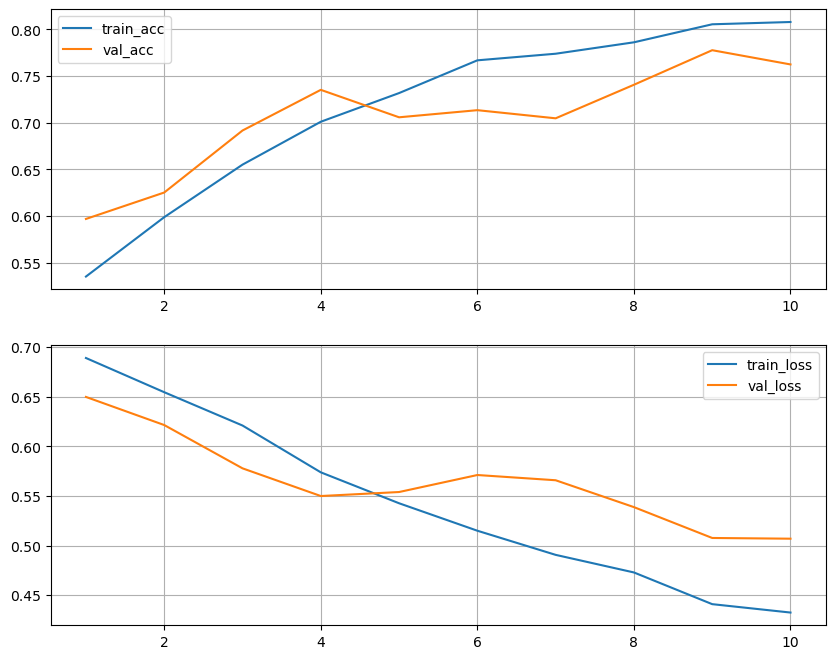

In [34]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = np.arange(1, len(train_acc) + 1)

fig, axs = plt.subplots(2, figsize=(10, 8))


axs[0].plot(epochs, train_acc, label='train_acc')
axs[0].plot(epochs, val_acc, label='val_acc')
axs[0].grid(True)
axs[0].legend()

axs[1].plot(epochs, train_loss, label='train_loss')
axs[1].plot(epochs, val_loss, label='val_loss')
axs[1].grid(True)
axs[1].legend()

plt.show()

In [35]:
np.std(np.array(train_loss))

0.08481263460171866

In [36]:
train_gen = ImageDataGenerator(rescale=1./255,
                               rotation_range=50,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest')
train_ds = train_gen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

test_gen = ImageDataGenerator(rescale=1./255)
test_ds = test_gen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.


In [37]:
history = model.fit(train_ds,
                    epochs=10,
                    validation_data=test_ds)

Epoch 1/10
184/184 [==============================] - 24s 131ms/step - loss: 0.5095 - accuracy: 0.7536 - val_loss: 0.6024 - val_accuracy: 0.7015
Epoch 2/10
184/184 [==============================] - 24s 130ms/step - loss: 0.4923 - accuracy: 0.7612 - val_loss: 0.5305 - val_accuracy: 0.7473
Epoch 3/10
184/184 [==============================] - 24s 130ms/step - loss: 0.4890 - accuracy: 0.7732 - val_loss: 0.5017 - val_accuracy: 0.7451
Epoch 4/10
184/184 [==============================] - 24s 129ms/step - loss: 0.4806 - accuracy: 0.7743 - val_loss: 0.4835 - val_accuracy: 0.7603
Epoch 5/10
184/184 [==============================] - 24s 129ms/step - loss: 0.4734 - accuracy: 0.7822 - val_loss: 0.4741 - val_accuracy: 0.7832
Epoch 6/10
184/184 [==============================] - 24s 129ms/step - loss: 0.4719 - accuracy: 0.7773 - val_loss: 0.5248 - val_accuracy: 0.7407
Epoch 7/10
184/184 [==============================] - 24s 130ms/step - loss: 0.4746 - accuracy: 0.7846 - val_loss: 0.4882 - val_ac

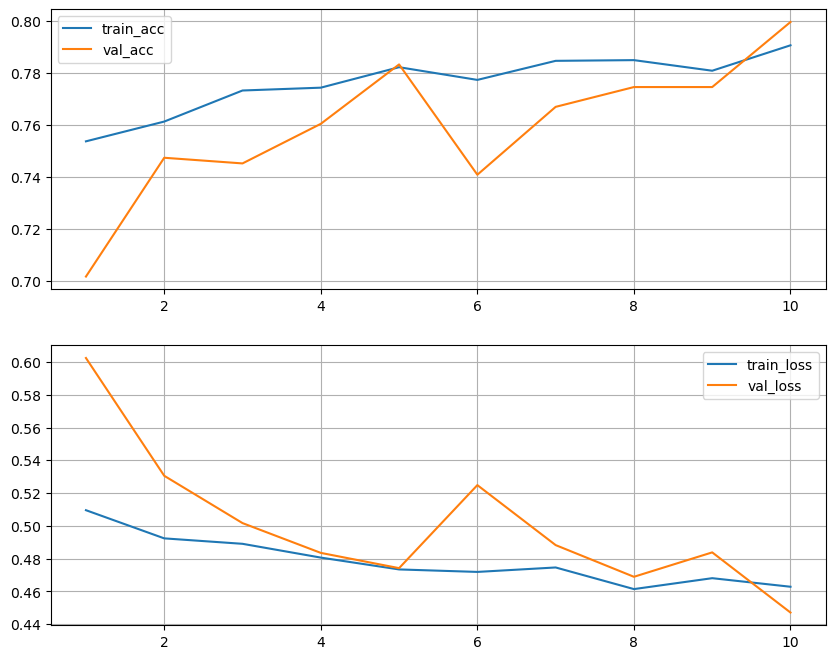

In [38]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = np.arange(1, len(train_acc) + 1)

fig, axs = plt.subplots(2, figsize=(10, 8))


axs[0].plot(epochs, train_acc, label='train_acc')
axs[0].plot(epochs, val_acc, label='val_acc')
axs[0].grid(True)
axs[0].legend()

axs[1].plot(epochs, train_loss, label='train_loss')
axs[1].plot(epochs, val_loss, label='val_loss')
axs[1].grid(True)
axs[1].legend()

plt.show()

In [39]:
np.mean(val_loss)

0.5004981815814972

In [40]:
val_acc[5:10]

[0.7407407164573669,
 0.7668845057487488,
 0.7745097875595093,
 0.7745097875595093,
 0.7995642423629761]

In [41]:
np.mean(val_acc[5:10])

0.7712418079376221